# Introduction
In Part III, we will use machine learning techniques to predict the power output (PE) of the power plant. The process goes like this: 

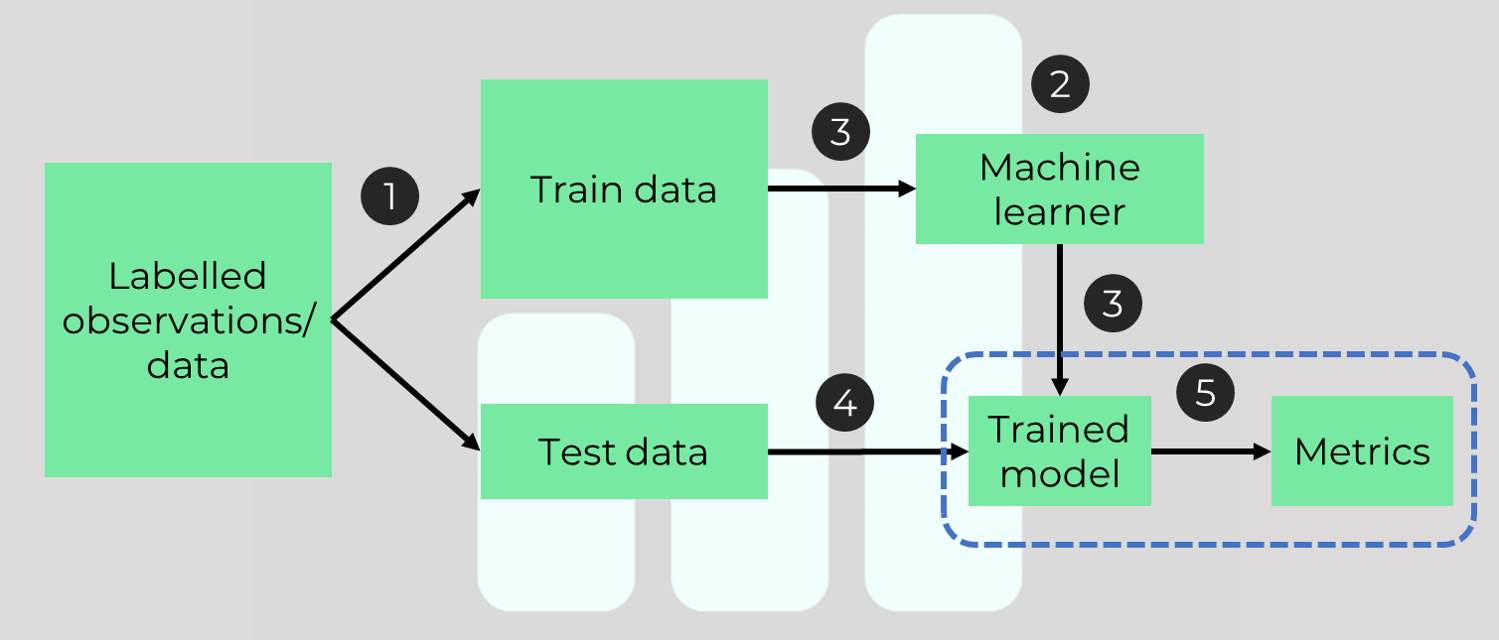

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following:
1. pandas as pd
2. numpy as np
3. seaborn as sns
4. numpy as np

In [26]:
# Step 1: Import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Read your Excel file as DataFrame
Next, read your Excel file into a DataFrame.

In [2]:
# Step 2: Read your Excel file
df = pd.read_excel("Folds5x2_pp.xlsx")
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### Step 3: Plot pairwise correlation of column values
Use the .corr() method of your DataFrame to generate a pairwise correlation plot. 

This plot will help us identify features that we can start with for linear regression.

If we use the default parameter, calling this method calculates the Pearson correlation coefficient - a statistic that measures linear correlation between two variables - between the combination of variables, and returns a correlation matrix. 

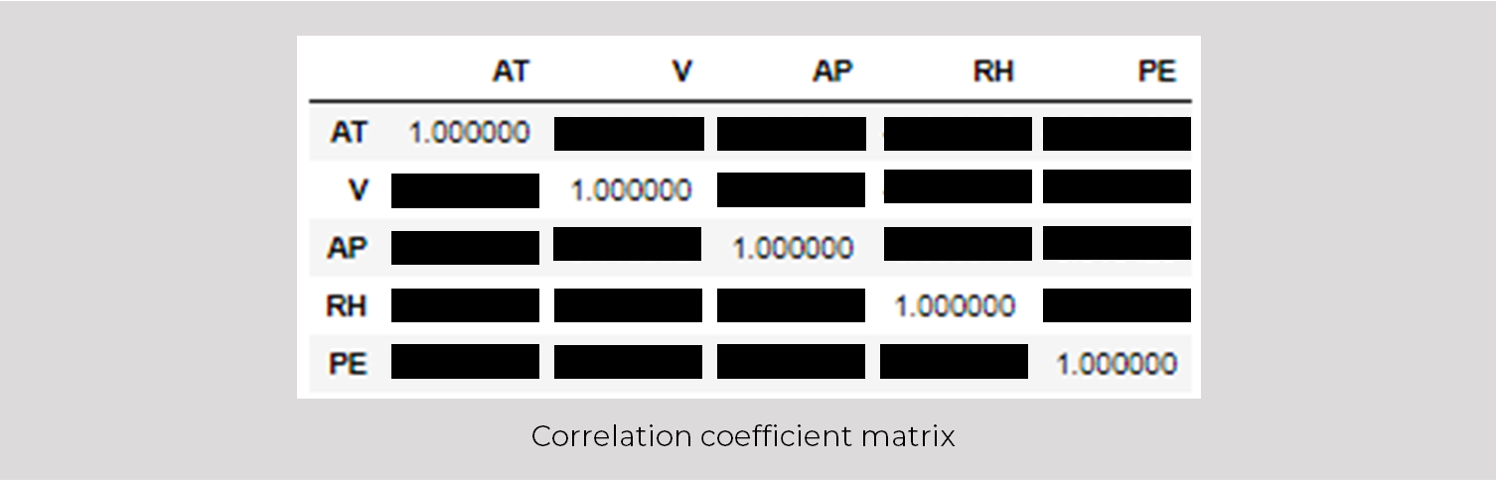

The Pearson correlation coefficient ranges between -1 (total linear negative correlation) and 1 (total linear positive correlation). 

In [3]:
# Step 3: Get your .corr() from your DataFrame
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


### Step 4: Import your machine learning libraries
Next up, let's import the machine learning libraries.

Here's what you need:
1. train_test_split from sklearn.model_selection
2. LinearRegression from sklearn.linear_model
3. mean_squared_error from sklearn.metrics
4. r2_score from sklearn.metrics

In [4]:
# Step 4: Import your machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Step 5: Prepare your independent and dependent variables
Based on the results of Step 3, you might have noticed that there is a high score between AT and PE. 

In that case, let's start with:
1. Declare a variable, and assign the indepedent variables to it, i.e. just take the 'AT' values from the DataFrame
2. Declare another variable, and assign the dependent variables to it, i.e. get only the 'PE' column values

In [15]:
# Step 5: Prepare your independent and dependent variables
X = df['AT']
y = df['PE']


### Step 6: Split your indepedent and dependent variables into train and test sets¶
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function. 

In [16]:
# Step 6: Split your independent and dependent variables into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Step 7: Train a LinearRegression model
Let's start simple, and train a linear regression model to predict PE based on AT results only.

This is what you'll need to do:

1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)

The recommended readings will be very helpful.

In [17]:
# Step 7a: Declare a variable to store the model (LinearRegression)
model = LinearRegression()

X_train = np.array(X).reshape((-1, 1))
X_train.shape


y_train = np.array(df['PE'])
y_train.shape

# Step 7b: Fit your train dataset
model.fit(X_train, y_train)

# Step 7c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = model.predict(X_train)

In [22]:
y.shape

(9568,)

### Step 8: Assess the prediction by the model
After you're done predicting, you will need to assess the predictions. To do this, you will need to print out:
1. square root of mean_squared_error between y test and prediction
2. r2_score between y_test and prediction

You will have to use numpy to square root the results of mean_squared_error.

In [24]:
# Step 8a: Print the square root of mean_squared_error of y test and the prediction
print(np.sqrt(mean_squared_error(y_train, y_pred)))

# Step 8b: Print the r2_score of y test and the prediction
r2_score(y,y_pred)

5.4250992627871355


0.8989475964148236

### Step 9: Plot a scatter plot between your y test and prediction
Another way to assess your prediction is to use a scatter plot where y axis is your predicted values and x axis contains your actual PE values.

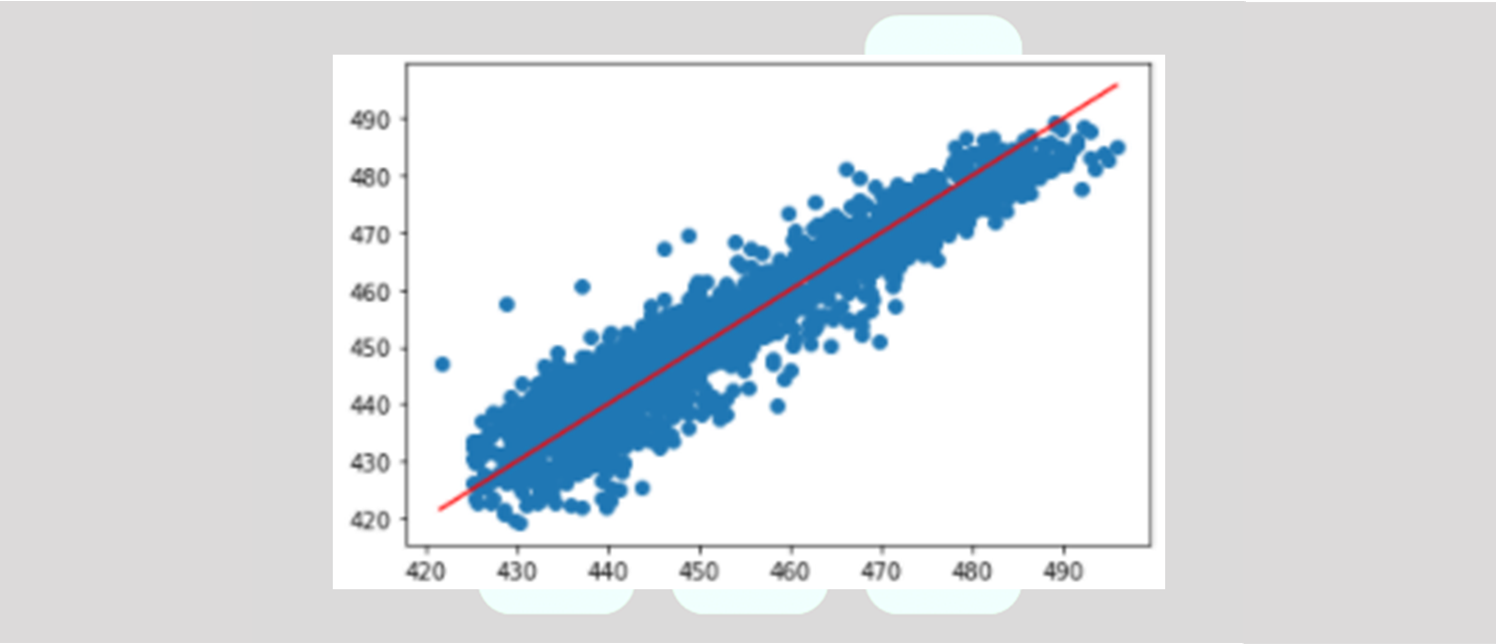

You can plot a straight line where y = x just to see ideally where all your points should lie in.

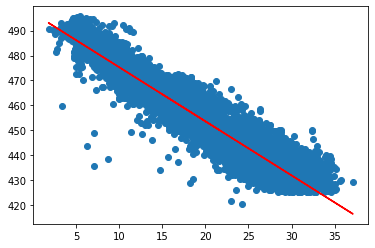

In [27]:
# Step 9a: Plot a scatter plot between your test values and linear regression prediction
plt.scatter(X_train, y_train)
plt.plot(X, y_pred, color='r')

# [Optional] Step 9b: Plot a straight line, where the first coordinate position is (y min, y min) and second is (y max, y max)

### Step 10: Repeat Steps 5 - 9 with full feature set
What happens when you use all features, i.e. AT, V, AP, and RH, instead of just AT. Let's find out.

Start with preparing X again, but with all features, and then train a new linear regression model.

21.509560620302416


/Users/kelly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PE'>

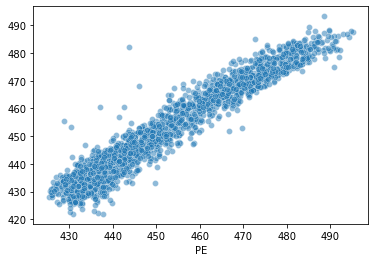

In [46]:
# Step 10a: Prepare independent variable DataFrame containing 'AT', 'V', 'AP', 'RH'
X = df.drop('PE', axis = 1)
y = df['PE']

# Step 10b: Split your independent and dependent variables into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Step 10c: Declare a variable to store the model (LinearRegression)
reg = LinearRegression()

# Step 10d: Fit your train dataset
reg.fit(X_train, y_train)

# Step 10e: Declare a variable and store your predictions that you make with your model using X test data
reg_pred = reg.predict(X_test)

# Step 10f: Print the square root of mean_squared_error of y test and the prediction
print(mean_squared_error(y_test, reg_pred))

# Step 10g: Print the r2_score of y test and the prediction
r2_score(y_test, reg_pred)

# Step 10h: Plot a scatter plot between your test values and linear regression prediction
sns.scatterplot(y_test, reg_pred, alpha = 0.5)

# [Optional] Step 10i: Plot a straight line, where the first coordinate position is (y min, y min) and second is (y max, y max)

(7654,)

### Step 11: Import other models
Your RMSE went down after using all of the features! Amazing. 

Next up, let's use decision tree and random forest regressions to predict our power plant output.

Start with importing:
1. DecisionTreeRegressor from sklearn.tree
2. RandomForestRegressor from sklearn.ensemble

Continue using the dataset with the full features, i.e. you do not need to prepare new independent and dependent variables.

In [47]:
# Step 11: Import your other ML models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Step 12: Repeat Step 10 with DecisionTreeRegressor
Let's do the same as our linear regression earlier, but with a decision tree this time.

No need to split, just declare your model object and proceed.

21.311017345872514
0.9274971690323114


/Users/kelly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PE'>

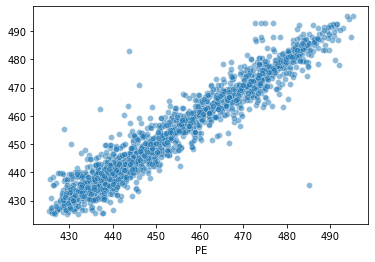

In [49]:
# Step 12a: Declare a variable to store the model (DecisionTreeRegressor)
tree = DecisionTreeRegressor()

# Step 12b: Fit your train dataset
tree.fit(X_train, y_train)

# Step 12c: Declare a variable and store your predictions that you make with your model using X test data
tree_pred = tree.predict(X_test)

# Step 12d: Print the square root of mean_squared_error of y test and the prediction
print(mean_squared_error(y_test, tree_pred))

# Step 12e: Print the r2_score of y test and the prediction
print(r2_score(y_test, tree_pred))

# Step 12f: Plot a scatter plot between your test values and decision tree prediction
sns.scatterplot(y_test, tree_pred, alpha = 0.5)

# [Optional] Step 12g: Plot a straight line, where the first coordinate position is (y min, y min) and second is (y max, y max)

### Step 13: Repeat Step 10 with RandomForestRegressor
Your results for a decision tree may or may not be better a linear regression, so let's try again with a random forest.

11.917419860914341
0.9594553998186204


/Users/kelly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PE'>

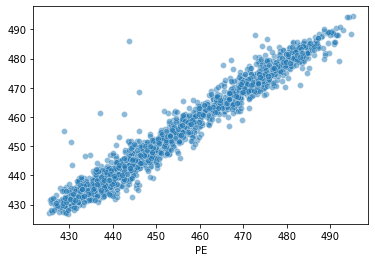

In [51]:
# Step 13a: Declare a variable to store the model (RandomForestRegressor)
forest = RandomForestRegressor()

# Step 13b: Fit your train dataset
forest.fit(X_train, y_train)

# Step 13c: Declare a variable and store your predictions that you make with your model using X test data
forest_pred = forest.predict(X_test)

# Step 13d: Print the square root of mean_squared_error of y test and the prediction
print(mean_squared_error(y_test, forest_pred))

# Step 13e: Print the r2_score of y test and the prediction
print(r2_score(y_test, forest_pred))

# Step 13f: Plot a scatter plot between your test values and random forest prediction
sns.scatterplot(y_test, forest_pred, alpha = 0.5)

# [Optional] Step 13g: Plot a straight line, where the first coordinate position is (y min, y min) and second is (y max, y max)

### Step 14: Get feature importance of random forest model
Using a random forest model reduced the RMSE a lot, and improved the r2 score even further.

To see what were the features that were used in building the model, we can use .feature_importances_ attribute of the model to get a list of importance scores associated with each feature.

In [54]:
# Step 14a: Print your train data's column names
print(X_train.columns)

# Step 14b: Print your .feature_importances_ attribute
print(forest.feature_importances_)

Index(['AT', 'V', 'AP', 'RH'], dtype='object')
[0.90263442 0.06024574 0.01921262 0.01790722]


### Interpreting the results
When we compare the results of linear regression and both decision tree and random forest regression, we can observe that there is not much differences in the performance.

More specifically, using the 'AT' values alone for linear regression yielded a model that was comparable to the other two 'more advanced' machine learning models. 

We use 'more advanced' here because of the perceived sophistication in the method. Sometimes, simple works too! 

When we looked at the feature importances of the random forest model, we find that 'AT' column had the most say in building the model, not unlike if we just used a linear regression with 'AT' values alone.

# The end
And that's the end! To recap, you've:
1. Collected data on a power plant
2. Visualized the data and identified linear relationships
3. Trained a machine learning model to predict power plant output

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning. 

You have successfully implemented machine learning in predicting power plant output. However, as you have noticed, there is a lot more room to improve for the model. The RMSE is good, but we think that it can be better. On top of that, it was a relatively simple dataset with not many features. 

That is the fate of a data scientist, to pursue better models that can help model the world out there.  

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG